### One component mixture, 2D, independent variables

In [22]:
import sys
if "spnhelp" in sys.modules.keys():
    del sys.modules["spnhelp"]
import spnhelp
from spn.structure.leaves.parametric.Parametric import Gaussian, Uniform
from spn.structure.Base import get_number_of_nodes, Product
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from spn.algorithms.Inference import likelihood
import clg
import math

[[1.         0.70710678]
 [0.70710678 1.        ]]
(1000, 1000)
0.7071067811865475
50


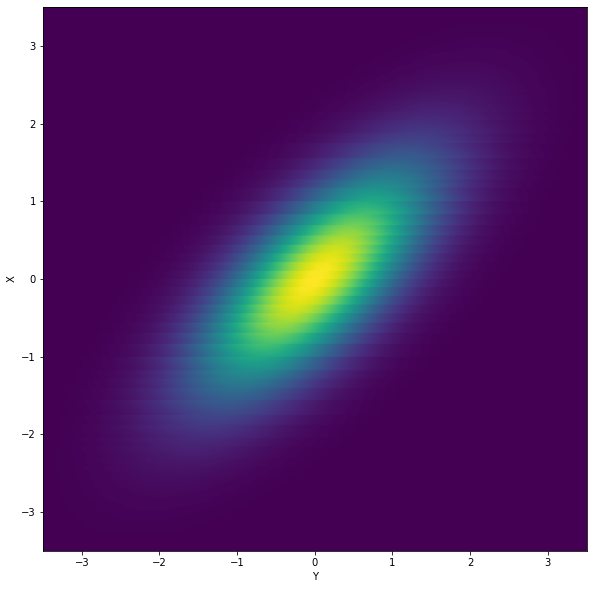

In [23]:
X = "X" @ clg.noise
a=0.5
Y = "Y" @ (math.sqrt(a)*X + math.sqrt(1-a)*clg.noise)
# display(X.get_graph(True))
print(X.get_Σ().to_numpy())
spn = spnhelp.clg_to_spn(X, crit_param=0.2, crit=spnhelp.CRIT_bounded_width, sloped=True)
# spnhelp.plot_marginals(spn, X)
# display(spnhelp.get_spn_graph(spn, X))
plt.rcParams['figure.figsize'] = [6, 6]
info1 = spnhelp.get_pdf_grid_values(spn, (7, 7), offset = np.array([0, 0]), resolution=1000, )
info2 = spnhelp.get_pdf_grid_values(spn, (7, 7), offset = np.array([0, 0]), resolution=1000, pdf = lambda x : stats.multivariate_normal.pdf(x=x, mean = [0,0], cov=X.get_Σ().to_numpy()))
total = np.row_stack([info1[0], info2[0]])
total = info1[0]
print(total.shape)
spnhelp.show_data((total, (7, 7),  np.array([0, 0])))
print(get_number_of_nodes(spn, Product))

### 2 component mixture with sampling

array([[3.06504473, 0.17057328],
       [0.17057328, 0.74507702]])

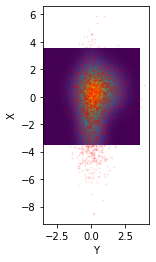

In [4]:
bump1 = Gaussian(mean=-1, stdev=2, scope=0) * Gaussian(mean=0, stdev=0.6, scope=1)
bump2 = Gaussian(mean=0.5, stdev=1, scope=0) * Gaussian(mean=0.5, stdev=1, scope=1)
spn = 0.5 * bump1 + 0.5 * bump2

info = spnhelp.get_pdf_grid_values(spn, (7, 7), np.array([0, 0]), 100)
spnhelp.show_data(info)


samples = spnhelp.sample_from_spn(spn, 4000)
plt.scatter(samples[:, 1], samples[:, 0], s=1, alpha=0.1, c = "red")

np.cov(samples, rowvar=False)

### Testing uniform density

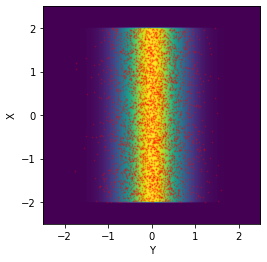

In [5]:
spn = Uniform(start=-2, end=2, scope=0) * Gaussian(mean=0, stdev=0.5, scope=1)
spn2 = Uniform(start=-2, end=2, scope=0) * Gaussian(mean=0, stdev=0.5, scope=1)
mix = 0.5 * spn + 0.5 * spn2
info = spnhelp.get_pdf_grid_values(mix, (5, 5), np.array([0, 0]), 100)
spnhelp.show_data(info)
samples = spnhelp.sample_from_spn(mix, 4000)
plt.scatter(samples[:, 1], samples[:, 0], s=1, alpha=0.2, c = "red");

# Approximating 1d gaussian with uniforms and slopyforms

In [1]:

sd, mean = 1, 0
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(2,3, figsize=(15,10))

slopes = [False, False, False, True, True ,True]
criterions = [spnhelp.CRIT_bounded_width, spnhelp.CRIT_uniform_bounded_deviation, spnhelp.CRIT_uniform_bounded_ratio, spnhelp.CRIT_bounded_width, spnhelp.CRIT_slopyform_bounded_deviation, spnhelp.CRIT_slopyform_bounded_ratio]
crit_params = [0.7, 0.07, 1.3, 0.5, 0.07, 1.3]
ratio_bounds = [0.0, 0.0, 1.3] * 2
deviation_bounds = [0.0, 0.07, 0.0] * 2
for i, (slope, crit, crit_param,ratio_b, devia_b) in enumerate(zip(slopes, criterions, crit_params, ratio_bounds, deviation_bounds)):
    coords = int(i // (len(slopes)*0.5)), int(i % (len(slopes)*0.5))
    spn = spnhelp.clg_to_spn("A" @ (sd*clg.noise + mean), crit_param=crit_param, crit=crit, disc_leaves=True, sloped=slope)
    ax[coords].plot(x, likelihood(spn, x.reshape(-1, 1)))
    if ratio_b != 0:
        ax[coords].plot(x, stats.norm.pdf(x, loc=mean, scale=sd)*ratio_b, linestyle="dashed", c = "r", label = "error bound")
        ax[coords].plot(x, stats.norm.pdf(x, loc=mean, scale=sd)/ratio_b, linestyle="dashed", c = "r")
    elif devia_b != 0:
        ax[coords].plot(x, np.maximum(0, stats.norm.pdf(x, loc=mean, scale=sd) + devia_b), linestyle="dashed", c = "r", label = "error bound")
        ax[coords].plot(x, np.maximum(0, stats.norm.pdf(x, loc=mean, scale=sd) - devia_b), linestyle="dashed", c = "r")
    else:
        ax[coords].plot(x, stats.norm.pdf(x, loc=mean, scale=sd), linestyle="dashed")
    ax[coords].legend()
;

NameError: name 'np' is not defined

# Same, but 2d independent gaussians

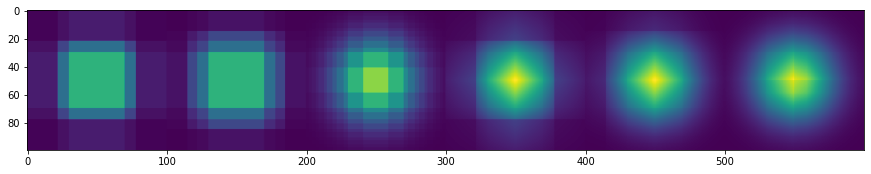

In [51]:
plt.rcParams["figure.figsize"] = (15, 10)



A = "A" @ clg.noise
B = "B" @ clg.noise
A & B


slopes = [False, False, False, True, True ,True]
criterions = [spnhelp.CRIT_bounded_width, spnhelp.CRIT_uniform_bounded_deviation, spnhelp.CRIT_uniform_bounded_ratio, spnhelp.CRIT_bounded_width, spnhelp.CRIT_slopyform_bounded_deviation, spnhelp.CRIT_slopyform_bounded_ratio]
crit_params = [2.0, 0.1, 1.3] * 2
ratio_bounds = [0.0, 0.0, crit_params[2]] * 2
deviation_bounds = [0.0, crit_params[1], 0.0] * 2

heatmaps = []
for i, (slope, crit, crit_param,ratio_b, devia_b) in enumerate(zip(slopes, criterions, crit_params, ratio_bounds, deviation_bounds)):
    spn = spnhelp.clg_to_spn(A, crit_param=crit_param, crit=crit, disc_leaves=True, sloped=slope)
    vals, _, _ = spnhelp.get_pdf_grid_values(spn, (5, 5), np.array([0, 0]), 100)
    heatmaps.append(vals)
heatmaps = np.array(heatmaps)

plt.imshow(np.reshape(heatmaps, (-1, 100)).T);

# Again same, but 2d dependent gaussians this time

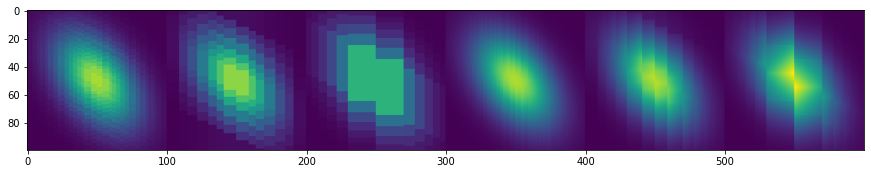

In [55]:
plt.rcParams["figure.figsize"] = (15, 10)


A = "A" @ clg.noise
B = "B" @ (0.5*A + clg.noise)


slopes = [False, False, False, True, True ,True]
criterions = [spnhelp.CRIT_bounded_width, spnhelp.CRIT_uniform_bounded_deviation, spnhelp.CRIT_uniform_bounded_ratio, spnhelp.CRIT_bounded_width, spnhelp.CRIT_slopyform_bounded_deviation, spnhelp.CRIT_slopyform_bounded_ratio]
crit_params = [0.25, 0.05, 1.5] * 2
ratio_bounds = [0.0, 0.0, crit_params[2]] * 2
deviation_bounds = [0.0, crit_params[1], 0.0] * 2

heatmaps = []
for i, (slope, crit, crit_param,ratio_b, devia_b) in enumerate(zip(slopes, criterions, crit_params, ratio_bounds, deviation_bounds)):
    spn = spnhelp.clg_to_spn(A, crit_param=crit_param, crit=crit, disc_leaves=True, sloped=slope)
    vals, _, _ = spnhelp.get_pdf_grid_values(spn, (5, 5), np.array([0, 0]), 100)
    heatmaps.append(vals)
heatmaps = np.array(heatmaps)

plt.imshow(np.reshape(heatmaps, (-1, 100)).T);